
# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset diabetes_classification.csv has 3 columns and 995 entries with the above data.

    Load the dataset.



In [186]:
import pandas as pd

data = pd.read_csv('/kaggle/input/naive-bayes/Naive-Bayes-Classification-Data.csv')


The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value)

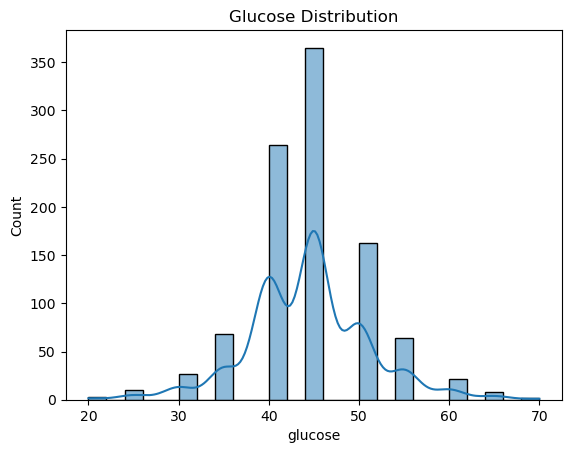

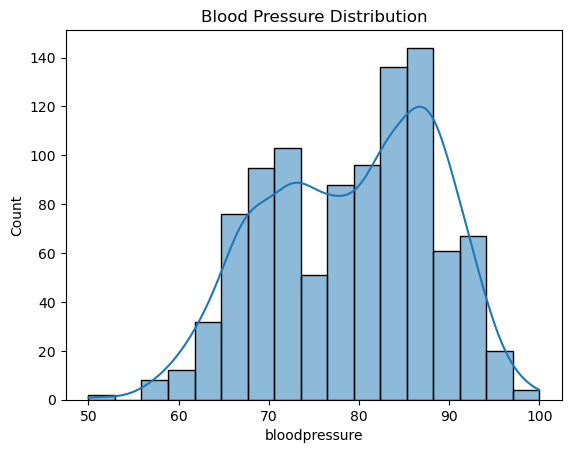

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['glucose'], kde=True)
plt.title('Glucose Distribution')
plt.show()

sns.histplot(data['bloodpressure'], kde=True)
plt.title('Blood Pressure Distribution')
plt.show()


The feature column glucose has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

    Split the dataset.
    Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional : 5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.


In [188]:
from sklearn.model_selection import train_test_split

X = data.drop('diabetes', axis=1) 
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))


Accuracy:  0.9296482412060302


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, lr_pred))

# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_pred))


Logistic Regression Accuracy:  0.9296482412060302
KNN Accuracy:  0.949748743718593
Decision Tree Accuracy:  0.9447236180904522


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the insurance.csv file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.
## 1. Load the data.

In [191]:
import pandas as pd

data = pd.read_csv('/kaggle/input/data-visualizatiion/insurance.csv')


## 2. Separate the numerical and categorical columns.
## 3. Label Encode the categorical columns.
## 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [192]:
cat_data = data.select_dtypes(include=['object'])
num_data = data.select_dtypes(exclude=['object'])


In [193]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_data = cat_data.apply(le.fit_transform)


In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_data_scaled = pd.DataFrame(scaler.fit_transform(num_data), columns=num_data.columns)


## 5. Split the data.

In [195]:
from sklearn.model_selection import train_test_split

X = pd.concat([num_data_scaled.drop('charges', axis=1), cat_data], axis=1)
y = num_data_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use RandomizedSearchCV from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.


In [196]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

param_dist = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}

svr = SVR()
rand = RandomizedSearchCV(svr, param_dist, cv=3, scoring='neg_mean_squared_error')
rand.fit(X_train, y_train)

best_svr = rand.best_estimator_
y_pred = best_svr.predict(X_test)

print("SVR MAE: ", mean_absolute_error(y_test, y_pred))
print("SVR MSE: ", mean_squared_error(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVR MAE:  0.21469047566928162
SVR MSE:  0.1598505206110732


## 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.



    Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
    Finally, use XGBoost Regressor and compare all the models. Comment which model had the least error (MAE and MSE).

You will be required to run  !pip install xgboost to import xgboost models.



In [197]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200], 'loss': ['linear', 'square', 'exponential']}

abr = AdaBoostRegressor()
grid = GridSearchCV(abr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_abr = grid.best_estimator_
y_pred = best_abr.predict(X_test)

print("AdaBoost MAE: ", mean_absolute_error(y_test, y_pred))
print("AdaBoost MSE: ", mean_squared_error(y_test, y_pred))


AdaBoost MAE:  0.3912648123160052
AdaBoost MSE:  0.20803786278834735


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the bookmyshow_ads.csv file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.
## 1. Load the data.

In [198]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/kaggle/input/book-my-show/dataset.csv')

# Encode categorical features
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])



## 2. Split the data.

In [199]:
from sklearn.model_selection import train_test_split

X = data.drop('Result', axis=1) 
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:

    Decision Tree
    Random Forest
    Adaboost
    Gradient Boost
    XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.


In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy: ", accuracy_score(y_test, predictions_dtc))

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
print("Random Forest Classifier Accuracy: ", accuracy_score(y_test, predictions_rfc))

# AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
predictions_abc = abc.predict(X_test)
print("AdaBoost Classifier Accuracy: ", accuracy_score(y_test, predictions_abc))

# Gradient Boost Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions_gbc = gbc.predict(X_test)
print("Gradient Boost Classifier Accuracy: ", accuracy_score(y_test, predictions_gbc))

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)
print("XGBoost Classifier Accuracy: ", accuracy_score(y_test, predictions_xgb))


Decision Tree Classifier Accuracy:  0.9443690637720489
Random Forest Classifier Accuracy:  0.9597467209407508
AdaBoost Classifier Accuracy:  0.9362279511533242
Gradient Boost Classifier Accuracy:  0.9488919041157847
XGBoost Classifier Accuracy:  0.9611035730438715


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file segmentation data.csv contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.
## 1. Import the necessary modules

In [201]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


## 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [202]:
data = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')


## 3. Do the necessary preprocessing of the data.

    Drop unwanted columns.

    Check for null values.

    Scale the numerical columns.

    Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.


In [203]:
data = data.drop('ID', axis=1)


In [204]:
print(data.isnull().sum())


Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [205]:
scaler = StandardScaler()
data[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])


In [206]:
def age_group(age):
    if age < 30:
        return 1
    elif age < 50:
        return 2
    else:
        return 3

data['Age'] = data['Age'].apply(age_group)


## 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

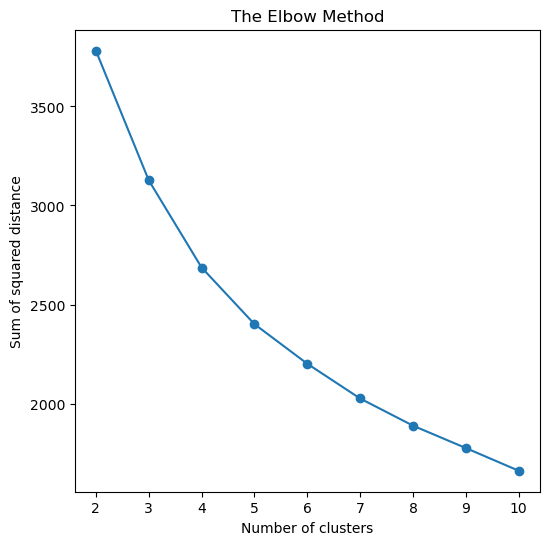

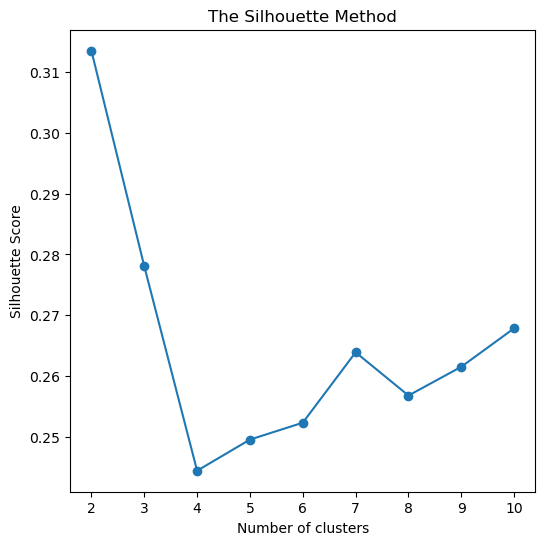

In [207]:
sse = []
silhouette = []

list_k = list(range(2, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
    silhouette.append(silhouette_score(data, km.labels_))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

# Plot silhouette against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, silhouette, '-o')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


## 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.


In [208]:
km = KMeans(n_clusters=4)
km.fit(data)
labels = km.labels_
sil_score = silhouette_score(data, km.labels_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.


In [209]:
eps_values = [0.1,0.2,0.5,1,2]
min_samples_values = [3,4,5,6]

best_eps = 0.1
best_min_samples = 3
best_sil_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(data)
        labels = db.labels_
        
        # Check the number of unique labels
        if len(set(labels)) < 2:
            continue
        
        sil_score = silhouette_score(data, labels)
        if sil_score > best_sil_score:
            best_sil_score = sil_score
            best_eps = eps
            best_min_samples = min_samples

print("Best eps =", best_eps)
print("Best min_samples =", best_min_samples)


Best eps = 0.5
Best min_samples = 3


## 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.


In [210]:
eps_values = [0.1,0.2,0.5,1,2]
min_samples_values = [3,4,5,6]

best_eps = 0.1
best_min_samples = 3
best_sil_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(data)
        labels = db.labels_
        
        # Check the number of unique labels
        if len(set(labels)) < 2:
            continue
        
        sil_score = silhouette_score(data, labels)
        if sil_score > best_sil_score:
            best_sil_score = sil_score
            best_eps = eps
            best_min_samples = min_samples

print("Best eps =", best_eps)
print("Best min_samples =", best_min_samples)


Best eps = 0.5
Best min_samples = 3


## 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.


In [211]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# DBSCAN class
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, data):
        labels = [0]*len(data)
        C = 0
        
        for idx in range(0, len(data)):
            if not (labels[idx] == 0):
               continue
            
            neighbors = self.range_query(data, idx)  # Changed data[idx] to idx
            
            if len(neighbors) < self.min_samples:
                labels[idx] = -1
            else: 
                C += 1
                self.grow_cluster(data, labels, idx, C, neighbors)  # Changed data[idx] to idx
                
        return labels

    def grow_cluster(self, data, labels, P, C, neighbors):
        labels[P] = C
        
        i = 0
        while i < len(neighbors):    
            Pn = neighbors[i]
            
            if labels[Pn] == -1:
                labels[Pn] = C
            
            elif labels[Pn] == 0:
                labels[Pn] = C
                Pn_neighbors = self.range_query(data, Pn)
                
                if len(Pn_neighbors) >= self.min_samples:
                    neighbors = neighbors + Pn_neighbors
            
            i += 1  

    def range_query(self, data, P):
        neighbors = []
        
        for Pn in range(0, len(data)):
            if np.linalg.norm(data[P] - data[Pn]) < self.eps:
                neighbors.append(Pn)
            
        return neighbors

# Load your data
df = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')

# Preprocess your data
df.drop(['ID'], axis=1, inplace=True)
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Using the class
model = DBSCAN(eps=0.3, min_samples=5)
labels = model.fit(df)

# Compute silhouette score
sil_score = silhouette_score(df, labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.20372116856552042
